# protostars
## 29- `star_proto_varA_K_delV.py` experiment 13-- on source SMM1
### part II. SMM1 results


CO and NaI spectral region

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp13/output/bb_absolute/run01/emcee_chain.npy")

In [4]:
ws.shape

(40, 3, 16)

In [5]:
burned = ws[:, -2:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [7]:
from matplotlib.ticker import MaxNLocator

In [8]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$\delta R$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$A_K$", r"$\alpha$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

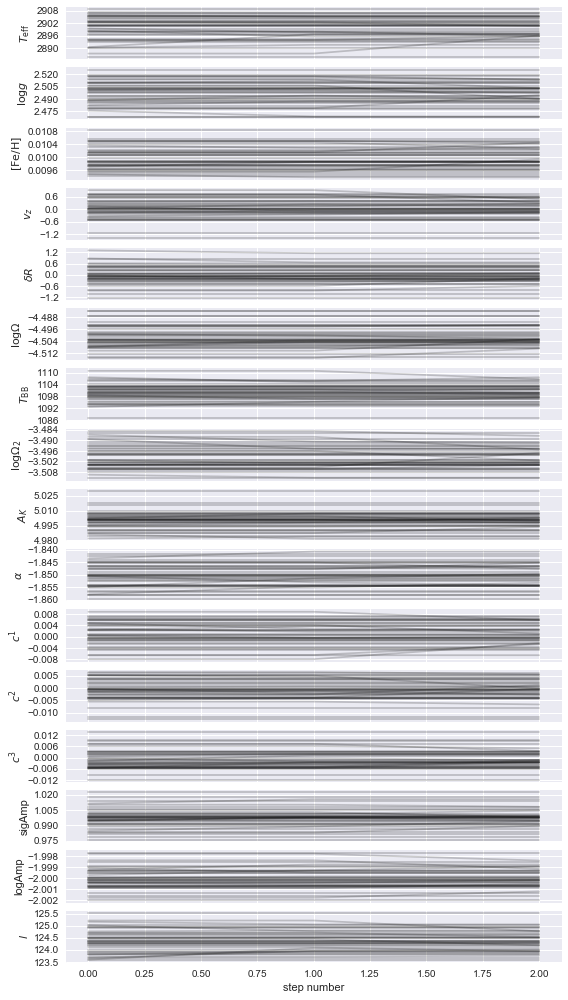

In [9]:
fig, axes = plt.subplots(16, 1, sharex=True, figsize=(8, 14))
for i in range(0, 16, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[15].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

Looks good!

In [ ]:
import corner
fig = corner.corner(fc, labels=label)

In [10]:
import h5py

f = h5py.File("../data/reduced/SMM1_NIRSPEC_CO_NaI.hdf5", "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])

f.close()

Read the raw models file:

In [15]:
raw_mods = np.load('../sf/exp13/output/bb_absolute/run01/raw_models.npy')

In [17]:
raw_mods.shape

(3, 40)

In [27]:
i_step = 2
j_walker = 23
star, disk, extinc, cheb = (raw_mods[i_step][j_walker][i, :] for i in range(4))

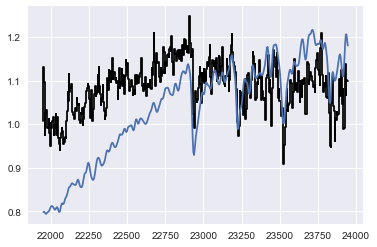

In [28]:
plt.step(wl, fl, 'k')
plt.plot(wl, star+disk) 

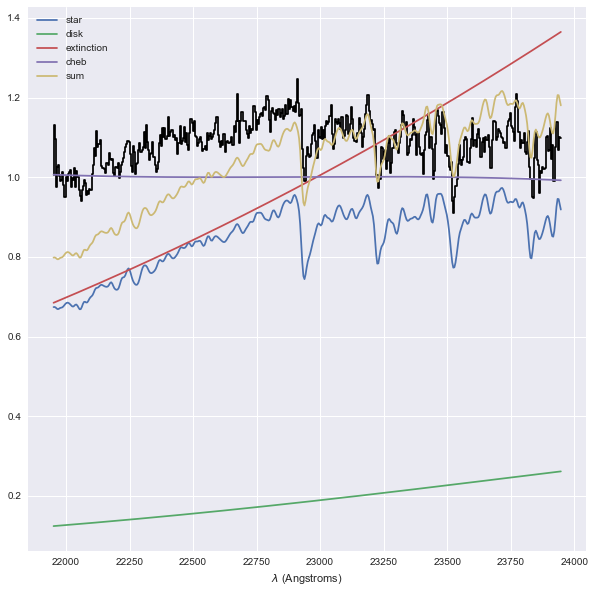

In [29]:
plt.figure(figsize=(10, 10))
plt.step(wl, fl, 'k')
plt.plot(wl, star, label = 'star')
plt.plot(wl, disk, label = 'disk')
plt.plot(wl, extinc, label = 'extinction')
plt.plot(wl, cheb, label = 'cheb')
plt.plot(wl, star+disk, label = 'sum')
plt.xlabel('$\lambda$ (Angstroms)')
plt.legend(loc='best')

In [32]:
net_model = star+disk

### Plot Residual

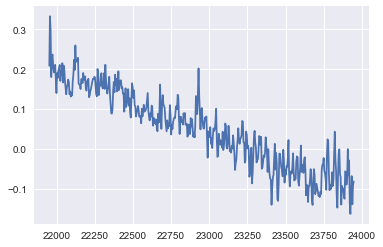

In [34]:
plt.plot(wl, fl-net_model)

## Animate

In [ ]:
n_pix = len(wl)

In [ ]:
from matplotlib import animation

n_draws = 200
rints = np.random.randint(0, nx, size=n_draws)
ps_es = np.zeros((n_draws, 16))

draws = []
stars = []
disks = []

r_step = np.random.randint(0, 1000, size=n_draws)
r_walk = np.random.randint(0,40, size=n_draws)

for i in range(n_draws):
    ps_es[i, :] = ws[r_walk[i],r_step[i], :]
    try:
        star, disk, extinc, cheb = (raw_mods[r_step[i]][r_walk[i]][k, :] for k in range(4))
        model = star+disk
        s_out = star
        d_out = disk
    except:
        model, s_out, d_out = np.zeros(n_pix), np.zeros(n_pix), np.zeros(n_pix)
    draws.append(model)
    stars.append(s_out)
    disks.append(d_out)

In [ ]:
dr_arr = np.array(draws)

In [ ]:
om_rat = 10**ps_es[:, 7]/(10**ps_es[:, 5])

In [ ]:
asi = om_rat.argsort()
ps_vals = ps_es[asi , :]
draw_vals = dr_arr[asi]

In [ ]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import seaborn as sns 
sns.set_context('talk', font_scale=1.5)
sns.set_style('ticks')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.step(wl, fl, 'k', label='Data')
ax.set_xlim(np.min(wl), np.max(wl))
ax.set_xlabel(r"$\lambda (\AA)$")
ax.set_ylim(bottom=0)
#ax.set_yticks([])
#ax.set_xticks([])

# First set up the figure, the axis, and the plot element we want to animate
line, = ax.plot([], [], color='#AA00AA', lw=2, label='Model')
line1, = ax.plot([], [], color='#AA0000', lw=2, label='Star')
line2, = ax.plot([], [], color='#0000AA', lw=2, label='Disk')

plt.legend(loc='upper left')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    return [line, line1, line2]

# animation function.  This is called sequentially
def animate(i):
    line.set_data(wl, draws[i])
    line1.set_data(wl, stars[i])
    line2.set_data(wl, disks[i])
    return [line, line1, line2]


# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('exp10_run01_anim.mp4', fps=10, dpi=300)

Looks good!